# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [188]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
temp = pd.read_csv('Temp_States.csv')


#### Print `temp`

In [4]:
temp.sample()

,City,State,Temperature
1,Albany,New York,9.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [9]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [11]:
subset = temp[temp['State'] == 'New York']
subset

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [12]:
subset['Temperature'].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [15]:
temp[['City', 'State']][temp['Temperature'] > 15]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [16]:
temp[['City']][temp['Temperature'] > 15]


,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [24]:
temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)][['City']]

,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [29]:
temp.groupby('State')['Temperature'].agg(['mean', 'std'])

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [30]:
employee = pd.read_csv('Employee.csv')
employee.sample()

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Explore the data types of the Temp dataframe. Comment your results

In [31]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

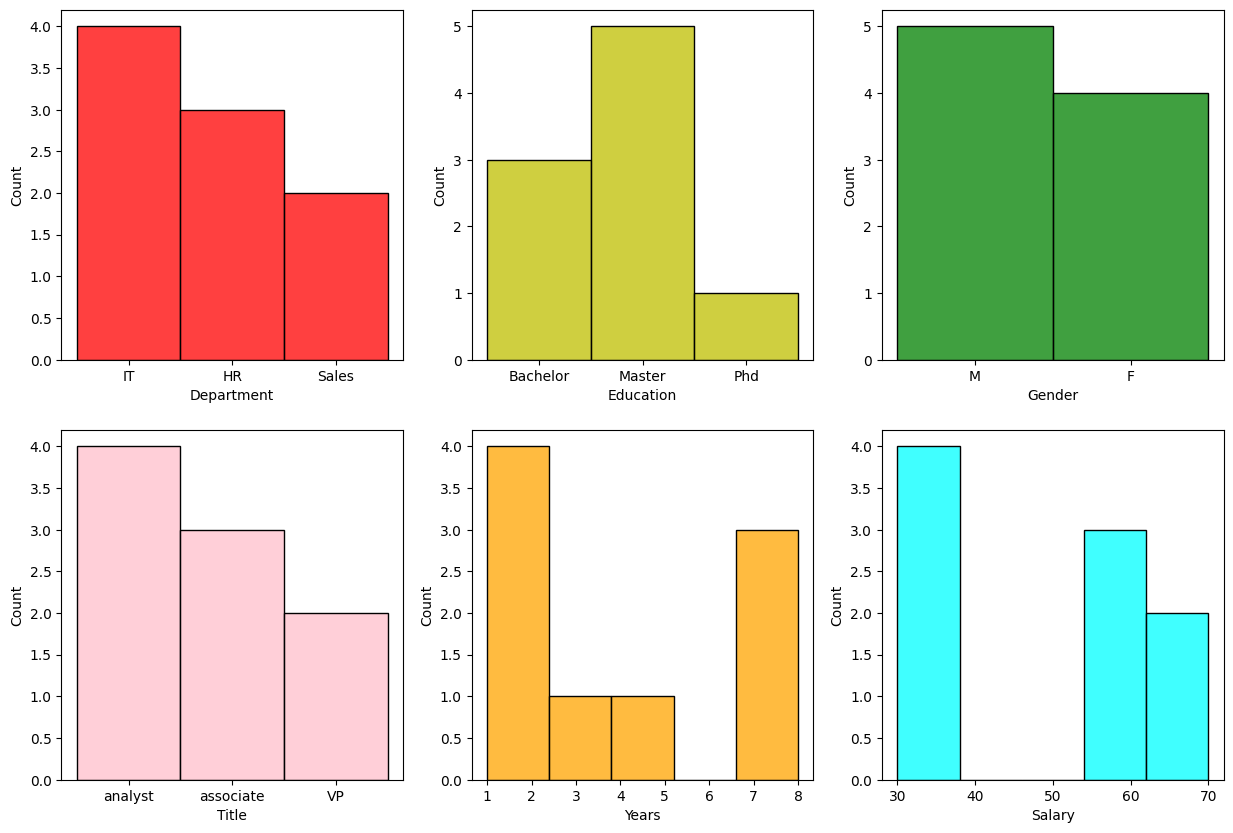

In [190]:
fig, axes = plt.subplots(2,3,figsize=(15, 10))
sns.histplot(data = employee, x = "Department", color = "r", ax=axes[0, 0]);
sns.histplot(data = employee, x = "Education", color = "y", ax=axes[0, 1]);
sns.histplot(data = employee, x = "Gender", color = "g",  ax=axes[0, 2]);
sns.histplot(data = employee, x = "Title", color= "pink", ax=axes[1, 0]);
sns.histplot(data = employee, x = "Years", color = "orange", ax=axes[1, 1]);
sns.histplot(data = employee, x = "Salary", color = "cyan", ax=axes[1, 2]);

#### What's the average salary in this company?

In [32]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [33]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [34]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [42]:
employee[['Name']][employee['Salary'] == employee['Salary'].min()]

,Name
1,Maria
2,David


#### Could you give all the information about an employee called David?

In [43]:
employee[employee['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [37]:
employee[['Salary']][employee['Name'] == 'David']


,Salary
2,30


#### Print all the rows where job title is associate

In [38]:
employee[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [44]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [45]:
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [46]:
employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [56]:
employee.groupby('Years')[['Salary']].agg(['mean'])

,Salary
,mean
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [50]:
employee.groupby('Title')['Salary'].agg(['mean'])


,mean
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

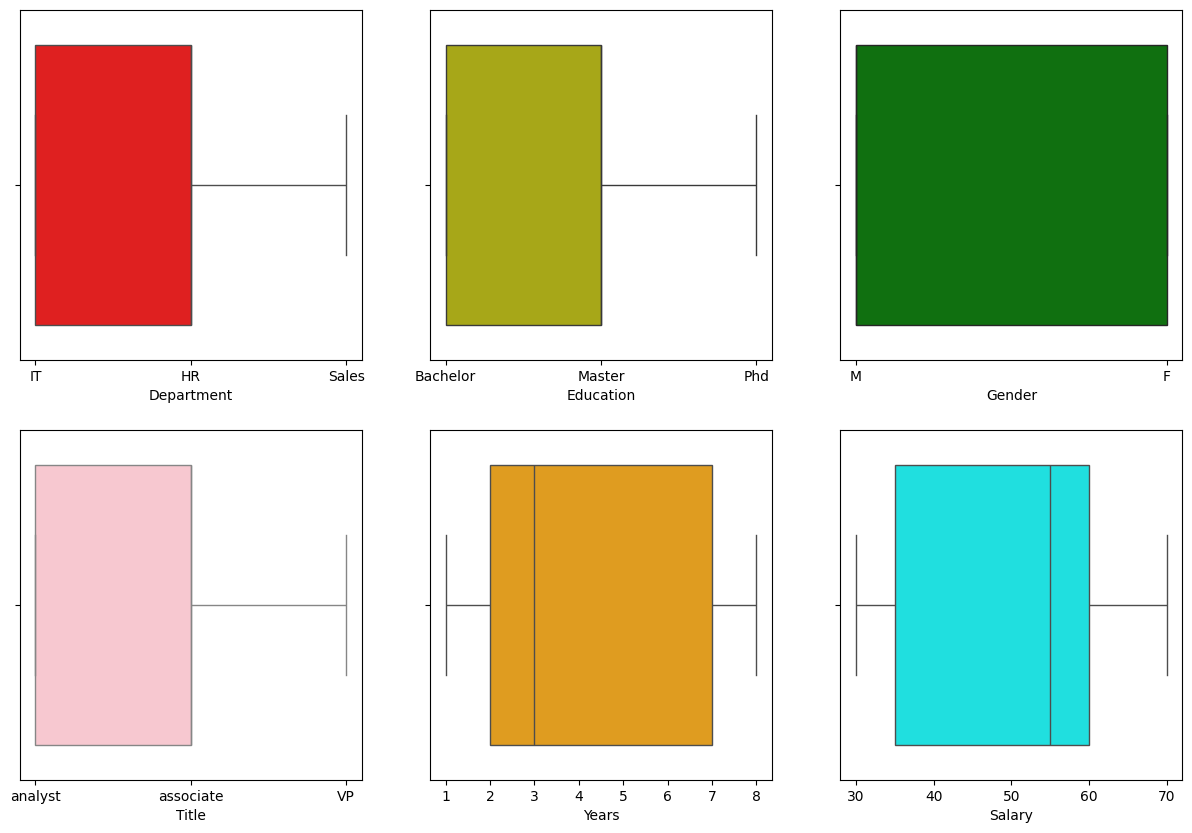

In [191]:
fig, axes = plt.subplots(2,3,figsize=(15, 10))
sns.boxplot(data = employee, x = "Department", color = "r", ax=axes[0, 0]);
sns.boxplot(data = employee, x = "Education", color = "y", ax=axes[0, 1]);
sns.boxplot(data = employee, x = "Gender", color = "g",  ax=axes[0, 2]);
sns.boxplot(data = employee, x = "Title", color= "pink", ax=axes[1, 0]);
sns.boxplot(data = employee, x = "Years", color = "orange", ax=axes[1, 1]);
sns.boxplot(data = employee, x = "Salary", color = "cyan", ax=axes[1, 2]);

In [198]:
employee['Salary'].quantile(0.25)

35.0

In [197]:
employee['Salary'].quantile(0.75)

60.0

#### Is the mean salary per gender different?

In [55]:
employee.groupby('Gender')[['Salary']].agg(['mean'])


,Salary
,mean
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [54]:
employee.groupby('Department')[['Salary', 'Years']].agg(['min', 'mean', 'max'])

Salary            Years              
              min   mean max   min      mean max
Department                                      
HR             30  45.00  70     2  4.666667   8
IT             30  48.75  70     1  4.500000   8
Sales          55  55.00  55     2  2.500000   3

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [100]:
employee.groupby('Department').apply(lambda x: x['Salary'].max() - x['Salary'].min()).reset_index(name='Difference')

,Department,Difference
0,HR,40
1,IT,40
2,Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [80]:
orders = pd.read_csv('Orders.csv')
orders.sample()
# orders.shape

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
363222,492299,578104,23082,2011,11,3,8,set 6 paper table lantern hearts,6,2011-11-23 08:43:00,3.75,13969,United Kingdom,22.5


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [73]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [139]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [75]:
orders['amount_spent'].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [ ]:
max_ = orders['amount_spent'].max()
print("The highest was: ", max_)

In [ ]:
min_ = orders['amount_spent'].min()
print("The lowest was: ", min_)

#### Select all the customers we have in Spain

In [194]:
es_customers = orders[['CustomerID', 'amount_spent']][orders['Country'] == 'Spain']
es_customers

,CustomerID,amount_spent
4250,12557,115.50
4251,12557,145.00
4252,12557,99.00
4253,12557,115.50
4254,12557,145.00
...,...,...
394733,17097,2.50
394734,17097,4.95
394735,17097,3.90
394736,17097,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [89]:
len(es_customers.groupby('CustomerID').value_counts())

30

#### Select all the customers who have bought more than 50 items ?

In [109]:
cust_up_to_50_items = orders.groupby('CustomerID').apply(lambda x: x[x['Quantity'] > 50])
print(f"{len(cust_up_to_50_items)} customers have bought more than 50 items.")
cust_up_to_50_items[cust_up_to_50_items['Quantity'] == cust_up_to_50_items['Quantity'].min()]

11609 customers have bought more than 50 items.


,,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
CustomerID,,,,,,,,,,,,,,,
14088,147041,211916,555400,20728,2011,6,4,17,lunch bag cars blue,51,2011-06-02 17:50:00,1.45,14088,United Kingdom,73.95
17457,204622,291834,562521,20897,2011,8,5,12,vintage notebook paris days,51,2011-08-05 12:48:00,2.55,17457,United Kingdom,130.05
18041,319887,436433,574143,47518F,2011,11,4,11,icon placemat pop art elvis,51,2011-11-03 11:27:00,0.12,18041,United Kingdom,6.12


#### Select orders from Spain that are above 50 items

In [123]:
o_es_above_50_items = orders[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)]
print(f"{len(o_es_above_50_items)} orders are above 50 items.")
o_es_above_50_items.sample()

39 orders are above 50 items.


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
289134,398631,571255,82482,2011,10,5,17,wooden picture frame white finish,72,2011-10-14 17:13:00,2.55,12454,Spain,183.6


#### Select all free orders

In [135]:
free_orders = orders[['UnitPrice']][orders['UnitPrice'] == 0]
print(f"{len(free_orders)} are free orders.")
free_orders.sample()

40 are free orders.


,UnitPrice
137127,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [144]:
orders_lunch_bag = orders[orders["Description"].str.contains("lunch bag")]
print(f"{len(orders_lunch_bag)} orders contains 'lunch bag'.")
orders_lunch_bag.sample()

11556 contains 'lunch bag'.


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6024,8409,537135,20725,2010,12,7,12,lunch bag red retrospot,2,2010-12-05 12:35:00,1.65,17059,United Kingdom,3.3


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [148]:
orders_year_string = orders_lunch_bag[orders_lunch_bag['year'] == 2011]
print(f"{len(orders_year_string)} orders contains 'lunch bag' and were made in 2011.")
orders_year_string.sample()

11234 orders contains 'lunch bag' and were made in 2011.


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
262724,365736,568713,20728,2011,9,3,16,lunch bag cars blue,10,2011-09-28 16:04:00,1.65,13061,United Kingdom,16.5


#### Show the frequency distribution of the amount spent in Spain.

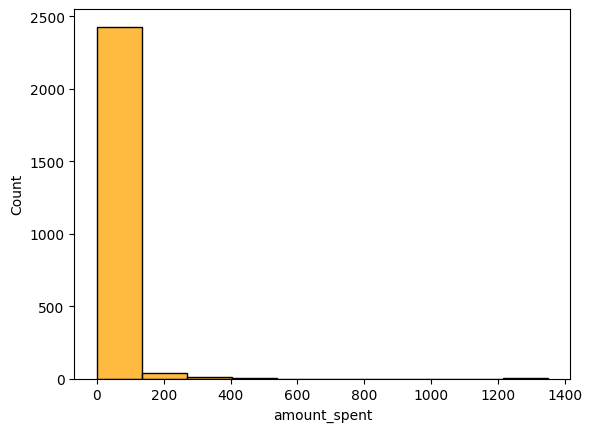

In [195]:
plt.figsize=(15, 10)
sns.histplot(data = es_customers, x="amount_spent",bins=10, color="orange");

#### Select all orders made in the month of August

In [154]:
orders_from_august = orders[orders['month'] == 8]
print(f"{len(orders_from_august)} orders were made in the month of August.")
orders_from_august.sample()

27013 orders were made in the month of August.


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
214627,304710,563613,20723,2011,8,4,8,strawberry charlotte bag,10,2011-08-18 08:49:00,0.85,12688,Israel,8.5


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [175]:
orders[['Quantity', 'Country']][orders['month'] == 8].groupby('Country').count()

,Quantity
Country,
Australia,107
Austria,88
Belgium,194
Canada,5
Channel Islands,140
Denmark,16
EIRE,593
Finland,61
France,569


#### What's the  average amount of money spent by country

In [151]:
orders.groupby('Country')[['amount_spent']].agg(['mean'])

,amount_spent
,mean
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169


#### What's the most expensive item?

In [186]:
most_expensive_item = orders.sort_values(by='UnitPrice', ascending=False).iloc[0]
description = most_expensive_item['Description']
unit_price = most_expensive_item['UnitPrice']

print(f"The most expensive item is '{description}' with a unit price of {unit_price}.")

The most expensive item is 'postage' with a unit price of 8142.75.


#### What was the average amount spent per year ?

In [150]:
orders.groupby('year')[['amount_spent']].agg(['mean'])

,amount_spent
,mean
year,
2010,21.892733
2011,22.430074
